# Estudio de los parametros del modelo


Queremos hacer un analisis de todos los parametros de nuestros dos modelos. 
- Fase_0
- Fase_1

### Fase 1

In [2]:
import torch
from pprint import pprint
import matplotlib.pyplot as plt
device = "cuda"
print(torch.cuda.is_available())

True


In [3]:
# Cargar los estados de los modelos
fase_0 = torch.load('Fase_0.pth')
fase_1 = torch.load('Fase_1.pth')


In [10]:
print("Weights Norm:")
wn = [(indice ,torch.norm(row) ) for indice ,row in enumerate(fase_1["linear_relu_stack.4.weight"])]
pprint(wn)
print("Bias:")
bias = [(indice ,row ) for indice ,row in enumerate(fase_1["linear_relu_stack.4.bias"])]
pprint(bias)

Weights Norm:
[(0, tensor(1.0966, device='cuda:0')),
 (1, tensor(1.1971, device='cuda:0')),
 (2, tensor(1.0860, device='cuda:0')),
 (3, tensor(1.0435, device='cuda:0')),
 (4, tensor(1.0837, device='cuda:0')),
 (5, tensor(1.1008, device='cuda:0')),
 (6, tensor(1.2016, device='cuda:0')),
 (7, tensor(1.2454, device='cuda:0')),
 (8, tensor(1.0349, device='cuda:0')),
 (9, tensor(1.1408, device='cuda:0'))]
Bias:
[(0, tensor(-0.0329, device='cuda:0')),
 (1, tensor(0.2524, device='cuda:0')),
 (2, tensor(0.0166, device='cuda:0')),
 (3, tensor(0.0098, device='cuda:0')),
 (4, tensor(0.0994, device='cuda:0')),
 (5, tensor(0.0797, device='cuda:0')),
 (6, tensor(-0.0611, device='cuda:0')),
 (7, tensor(0.0681, device='cuda:0')),
 (8, tensor(-0.2061, device='cuda:0')),
 (9, tensor(-0.0385, device='cuda:0'))]


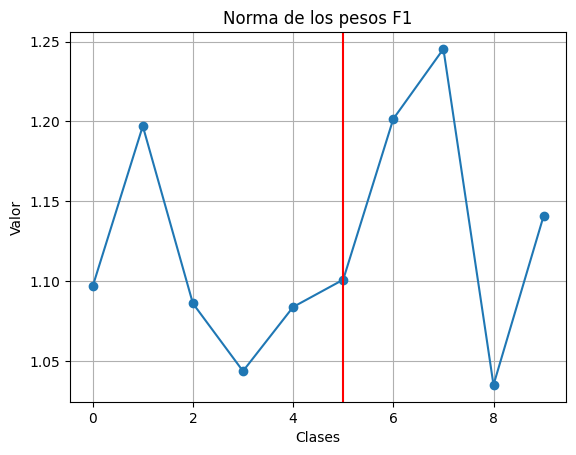

In [5]:
# Convertir los datos en listas separadas para x e y
x = [item[0] for item in wn]
y = [item[1].item() for item in wn]  # Convertir los tensores a valores numéricos

# Crear el gráfico
plt.plot(x, y, marker='o', linestyle='-')
plt.xlabel('Clases')
plt.ylabel('Valor')
plt.title('Norma de los pesos F1')
plt.grid(True)
plt.axvline(5, color = "r")
plt.show()

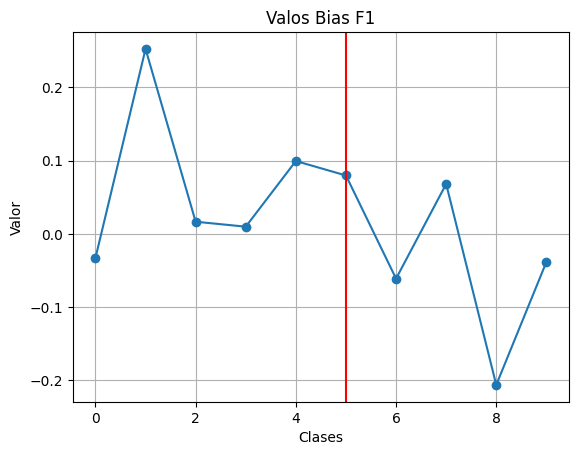

In [11]:
# Convertir los datos en listas separadas para x e y
x = [item[0] for item in bias]
y = [item[1].item() for item in bias]  # Convertir los tensores a valores numéricos

# Crear el gráfico
plt.plot(x, y, marker='o', linestyle='-')
plt.xlabel('Clases')
plt.ylabel('Valor')
plt.title('Valos Bias F1')
plt.grid(True)

plt.axvline(5, color = "r")
plt.show()

- Los bias para las clases (5,9) son mas bajos que para las otras clases

### Fase 0

In [12]:
print("Weights Norm:")
wn = [(indice ,torch.norm(row) ) for indice ,row in enumerate(fase_0["linear_relu_stack.4.weight"])]
pprint(wn)
print("Bias:")
bias = [(indice ,row ) for indice ,row in enumerate(fase_0["linear_relu_stack.4.bias"])]
pprint(bias)

Weights Norm:
[(0, tensor(1.1837, device='cuda:0')),
 (1, tensor(1.2546, device='cuda:0')),
 (2, tensor(1.1479, device='cuda:0')),
 (3, tensor(1.1303, device='cuda:0')),
 (4, tensor(1.2050, device='cuda:0')),
 (5, tensor(0.6537, device='cuda:0')),
 (6, tensor(0.6658, device='cuda:0')),
 (7, tensor(0.6536, device='cuda:0')),
 (8, tensor(0.6560, device='cuda:0')),
 (9, tensor(0.6453, device='cuda:0'))]
Bias:
[(0, tensor(0.0374, device='cuda:0')),
 (1, tensor(0.3143, device='cuda:0')),
 (2, tensor(0.0779, device='cuda:0')),
 (3, tensor(0.0790, device='cuda:0')),
 (4, tensor(0.1872, device='cuda:0')),
 (5, tensor(-0.0808, device='cuda:0')),
 (6, tensor(-0.1150, device='cuda:0')),
 (7, tensor(-0.0970, device='cuda:0')),
 (8, tensor(-0.1229, device='cuda:0')),
 (9, tensor(-0.0929, device='cuda:0'))]


Le da puntuaciones muy bajas a las clases que no ha visto

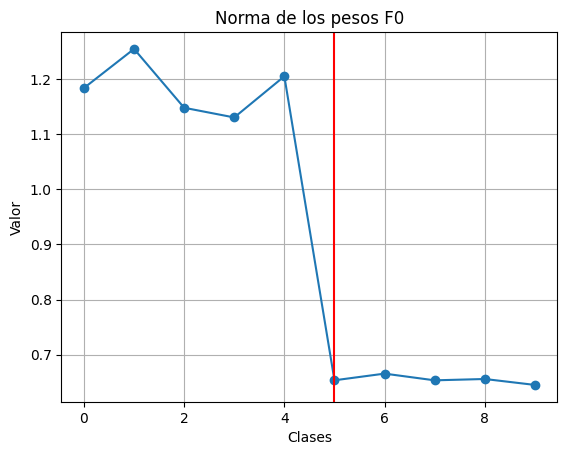

In [13]:
# Convertir los datos en listas separadas para x e y
x = [item[0] for item in wn]
y = [item[1].item() for item in wn]  # Convertir los tensores a valores numéricos

# Crear el gráfico
plt.plot(x, y, marker='o', linestyle='-')
plt.xlabel('Clases')
plt.ylabel('Valor')
plt.title('Norma de los pesos F0')
plt.grid(True)
plt.axvline(5, color = "r")
plt.show()

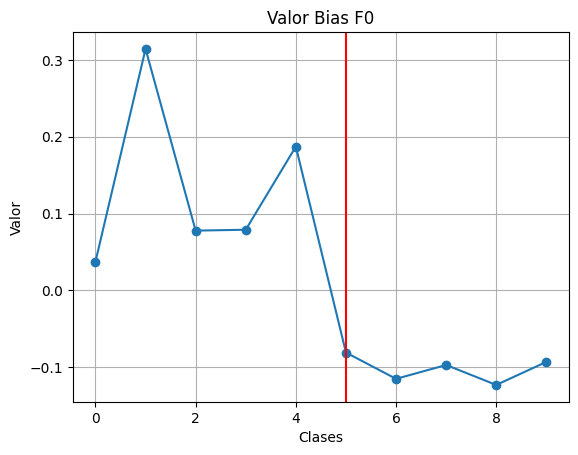

In [14]:
# Convertir los datos en listas separadas para x e y
x = [item[0] for item in bias]
y = [item[1].item() for item in bias]  # Convertir los tensores a valores numéricos

# Crear el gráfico
plt.plot(x, y, marker='o', linestyle='-')
plt.xlabel('Clases')
plt.ylabel('Valor')
plt.title('Valor Bias F0')
plt.grid(True)

plt.axvline(5, color = "r")
plt.show()

- De igual forma para los bias, da valores bastante bajos para las clases que no ha visto

### Pesos de la combinación mas eficiente

In [23]:
fase_0 = torch.load('Fase_0.pth')
fase_1 = torch.load('Fase_1.pth')

# Transferir el clasificador de Fase_0 a Fase_1
fase_1["linear_relu_stack.4.weight"][5:10, :] = fase_0["linear_relu_stack.4.weight"][5:10, :]
fase_1["linear_relu_stack.4.bias"][5:10] = fase_0["linear_relu_stack.4.bias"][5:10]

print("Weights Norm:")
wn = [(indice ,torch.norm(row) ) for indice ,row in enumerate(fase_1["linear_relu_stack.4.weight"])]
pprint(wn)

print("Bias:")
bias = [(indice ,row ) for indice ,row in enumerate(fase_1["linear_relu_stack.4.bias"])]
pprint(bias)

Weights Norm:
[(0, tensor(1.0966, device='cuda:0')),
 (1, tensor(1.1971, device='cuda:0')),
 (2, tensor(1.0860, device='cuda:0')),
 (3, tensor(1.0435, device='cuda:0')),
 (4, tensor(1.0837, device='cuda:0')),
 (5, tensor(0.6537, device='cuda:0')),
 (6, tensor(0.6658, device='cuda:0')),
 (7, tensor(0.6536, device='cuda:0')),
 (8, tensor(0.6560, device='cuda:0')),
 (9, tensor(0.6453, device='cuda:0'))]
Bias:
[(0, tensor(-0.0329, device='cuda:0')),
 (1, tensor(0.2524, device='cuda:0')),
 (2, tensor(0.0166, device='cuda:0')),
 (3, tensor(0.0098, device='cuda:0')),
 (4, tensor(0.0994, device='cuda:0')),
 (5, tensor(-0.0808, device='cuda:0')),
 (6, tensor(-0.1150, device='cuda:0')),
 (7, tensor(-0.0970, device='cuda:0')),
 (8, tensor(-0.1229, device='cuda:0')),
 (9, tensor(-0.0929, device='cuda:0'))]


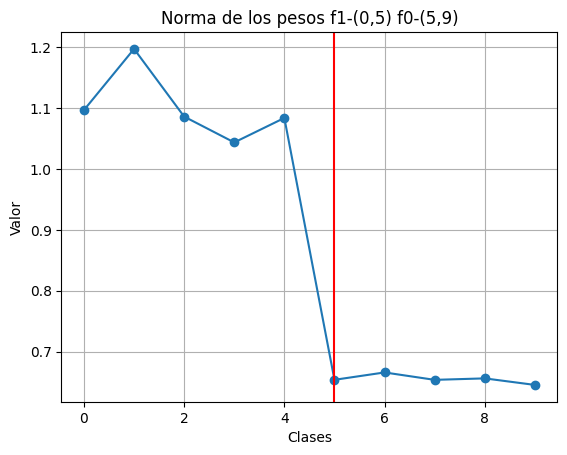

In [16]:

wn = [(indice ,torch.norm(row) ) for indice ,row in enumerate(fase_1["linear_relu_stack.4.weight"])]
# Convertir los datos en listas separadas para x e y
x = [item[0] for item in wn]
y = [item[1].item() for item in wn]  # Convertir los tensores a valores numéricos

# Crear el gráfico
plt.plot(x, y, marker='o', linestyle='-')
plt.xlabel('Clases')
plt.ylabel('Valor')
plt.title('Norma de los pesos f1-(0,5) f0-(5,9)')
plt.grid(True)
plt.axvline(5, color = "r")
plt.show()

- Darle una puntuacion muy baja a las clases que el modelo esta sesgado podría ayudar en la clasificación

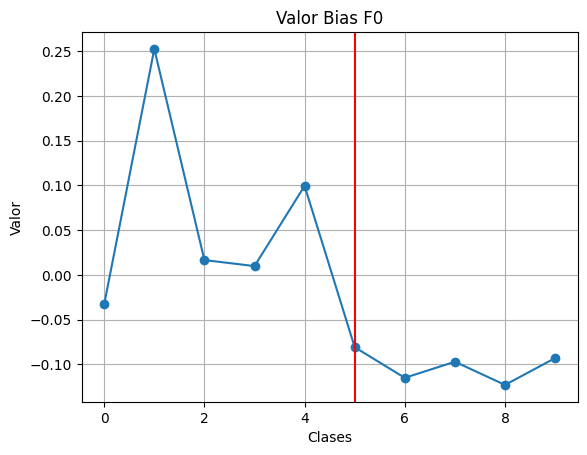

In [24]:
# Convertir los datos en listas separadas para x e y
x = [item[0] for item in bias]
y = [item[1].item() for item in bias]  # Convertir los tensores a valores numéricos

# Crear el gráfico
plt.plot(x, y, marker='o', linestyle='-')
plt.xlabel('Clases')
plt.ylabel('Valor')
plt.title('Valor Bias F0')
plt.grid(True)

plt.axvline(5, color = "r")
plt.show()

### Diferencias entre los pesos y bias entre cada modelo

In [18]:
fase_0 = torch.load('Fase_0.pth')
fase_1 = torch.load('Fase_1.pth')

In [19]:
print("Weights Norm:")

diff_w = [(indice ,abs(torch.norm(row_f1) - torch.norm(row_f0)) ) for indice ,(row_f1, row_f0) in enumerate(zip(fase_1["linear_relu_stack.4.weight"], fase_0["linear_relu_stack.4.weight"]))] 
pprint(diff_w)
print("Bias:")
diff_b = [(indice ,abs(row_f1 - row_f0) ) for indice ,(row_f1, row_f0) in enumerate(zip(fase_1["linear_relu_stack.4.bias"], fase_0["linear_relu_stack.4.bias"])) ]
pprint(diff_b)

Weights Norm:
[(0, tensor(0.0870, device='cuda:0')),
 (1, tensor(0.0575, device='cuda:0')),
 (2, tensor(0.0619, device='cuda:0')),
 (3, tensor(0.0868, device='cuda:0')),
 (4, tensor(0.1213, device='cuda:0')),
 (5, tensor(0.4472, device='cuda:0')),
 (6, tensor(0.5358, device='cuda:0')),
 (7, tensor(0.5918, device='cuda:0')),
 (8, tensor(0.3789, device='cuda:0')),
 (9, tensor(0.4955, device='cuda:0'))]
Bias:
[(0, tensor(0.0702, device='cuda:0')),
 (1, tensor(0.0620, device='cuda:0')),
 (2, tensor(0.0613, device='cuda:0')),
 (3, tensor(0.0692, device='cuda:0')),
 (4, tensor(0.0878, device='cuda:0')),
 (5, tensor(0.1604, device='cuda:0')),
 (6, tensor(0.0539, device='cuda:0')),
 (7, tensor(0.1650, device='cuda:0')),
 (8, tensor(0.0832, device='cuda:0')),
 (9, tensor(0.0544, device='cuda:0'))]


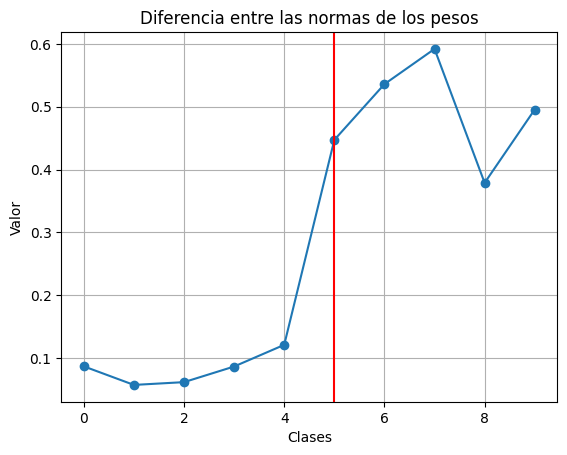

In [21]:
# Convertir los datos en listas separadas para x e y
x = [item[0] for item in diff_w]
y = [item[1].item() for item in diff_w]  # Convertir los tensores a valores numéricos

# Crear el gráfico
plt.plot(x, y, marker='o', linestyle='-')
plt.xlabel('Clases')
plt.ylabel('Valor')
plt.title('Diferencia entre las normas de los pesos')
plt.grid(True)
plt.axvline(5, color = "r")
plt.show()

Los pesos no cambian demasiado para las clases antiguas, pero para las nuevas cambias bastante.

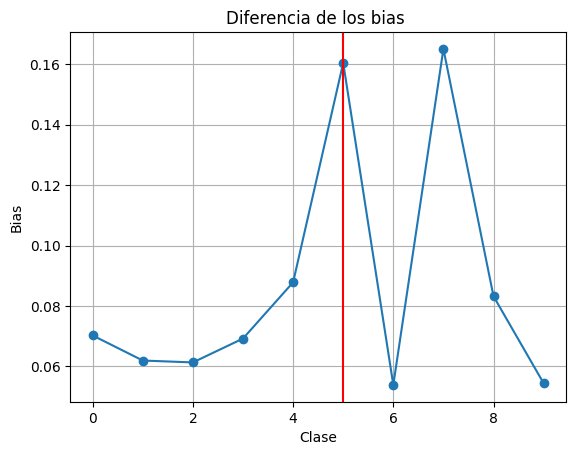

In [22]:
# Convertir los datos en listas separadas para x e y
x = [item[0] for item in diff_b]
y = [item[1].item() for item in diff_b]  # Convertir los tensores a valores numéricos

# Crear el gráfico
plt.plot(x, y, marker='o', linestyle='-')
plt.xlabel('Clase')
plt.ylabel('Bias')
plt.title('Diferencia de los bias ')
plt.grid(True)

plt.axvline(5, color = "r")
plt.show()

De igual forma, cambian bastante para las nuevas clases, aunque solo para ciertas clases en especifico no para todas.